In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1234)

is_restart = True
n_epoch = 10000
n_plot = 50
datasize = 50
tstep = 1
n_exp_train = 20
n_exp_test = 10
n_exp = n_exp_train + n_exp_test
noise = 0.05
ns = 6
nr = 3
atol = 1e-6
rtol = 1e-3
lb = 1e-6
ub = 1e1


In [3]:
def arrhenius(logA, Ea, T):
    R = 1.98720425864083e-3  # kcal/(mol*K)
    return np.exp(logA) * np.exp(-Ea / (R * T))

def true_ode_func(t, y, k):
    r1 = k[0] * y[0] * y[1]
    r2 = k[1] * y[2] * y[1]
    r3 = k[2] * y[3] * y[1]
    dydt = [-r1,
            -r1 - r2 - r3,
            r1 - r2,
            r2 - r3,
            r3,
            r1 + r2 + r3,
            0.0]
    return dydt

In [4]:
logA = np.array([18.60, 19.13, 7.93])
Ea = np.array([14.54, 14.42, 6.47]) * 4184  # 转换为J/mol

u0_list = np.random.rand(n_exp, ns + 1).astype(np.float32)
u0_list[:, 0:2] = u0_list[:, 0:2] * 2.0 + 0.2
u0_list[:, 2:ns] = 0.0
u0_list[:, ns] = u0_list[:, ns] * 20.0 + 323.0  # T[K]

tspan = [0.0, datasize * tstep]
tsteps = np.linspace(tspan[0], tspan[1], datasize)

ode_data_list = np.zeros((n_exp, ns, datasize), dtype=np.float32)

for i in range(n_exp):
    u0 = u0_list[i, :]
    T = u0[-1]
    k = arrhenius(logA, Ea, T)
    sol = solve_ivp(true_ode_func, tspan, u0, args=(k,), t_eval=tsteps, atol=atol, rtol=rtol)
    ode_data = sol.y[:-1]  # 去掉温度项
    ode_data += np.random.randn(*ode_data.shape) * ode_data * noise
    ode_data_list[i, :, :] = ode_data

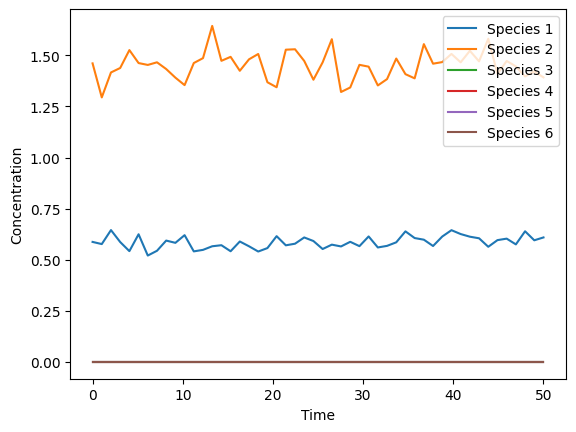

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(1234)

# 参数设置
is_restart = True
n_epoch = 10000
n_plot = 50
datasize = 50
tstep = 1
n_exp_train = 20
n_exp_test = 10
n_exp = n_exp_train + n_exp_test
noise = 0.05
ns = 6
nr = 3
atol = 1e-6
rtol = 1e-3
lb = 1e-6
ub = 1e1

# 反应速率常数的参数
logA = np.array([18.60, 19.13, 7.93])
Ea = np.array([14.54, 14.42, 6.47]) * 4184  # 转换为J/mol

def arrhenius(logA, Ea, T):
    R = 1.98720425864083e-3  # kcal/(mol*K)
    return np.exp(logA) * np.exp(-Ea / (R * T))

def true_ode_func(t, y, k):
    r1 = k[0] * y[0] * y[1]
    r2 = k[1] * y[2] * y[1]
    r3 = k[2] * y[3] * y[1]
    dydt = [-r1,
            -r1 - r2 - r3,
            r1 - r2,
            r2 - r3,
            r3,
            r1 + r2 + r3,
            0.0]
    return dydt

# 初始条件
u0_list = np.random.rand(n_exp, ns + 1).astype(np.float32)
u0_list[:, 0:2] = u0_list[:, 0:2] * 2.0 + 0.2
u0_list[:, 2:ns] = 0.0
u0_list[:, ns] = u0_list[:, ns] * 20.0 + 323.0  # T[K]

# 时间范围
tspan = [0.0, datasize * tstep]
tsteps = np.linspace(tspan[0], tspan[1], datasize)

# 生成数据集
ode_data_list = np.zeros((n_exp, ns, datasize), dtype=np.float32)

for i in range(n_exp):
    u0 = u0_list[i, :]
    T = u0[-1]
    k = arrhenius(logA, Ea, T)
    sol = solve_ivp(true_ode_func, tspan, u0, args=(k,), t_eval=tsteps, atol=atol, rtol=rtol)
    ode_data = sol.y[:-1]  # 去掉温度项
    ode_data += np.random.randn(*ode_data.shape) * ode_data * noise
    ode_data_list[i, :, :] = ode_data

# # 可视化生成的数据
# for i in range(n_exp):
#     for j in range(ns):
#         plt.plot(tsteps, ode_data_list[i, j, :], label=f'Exp {i+1}, Species {j+1}')
# plt.xlabel('Time')
# plt.ylabel('Concentration')
# plt.legend()
# plt.show()
for j in range(ns):
    plt.plot(tsteps, ode_data_list[0, j, :], label=f'Species {j+1}')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


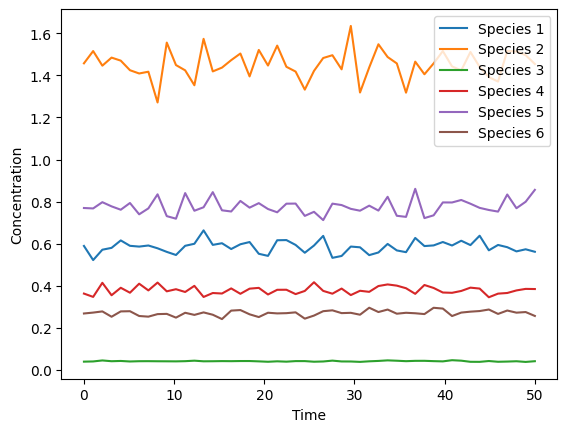

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(1234)

# 参数设置
is_restart = True
n_epoch = 10000
n_plot = 50
datasize = 50
tstep = 1
n_exp_train = 20
n_exp_test = 10
n_exp = n_exp_train + n_exp_test
noise = 0.05
ns = 6
nr = 3
atol = 1e-6
rtol = 1e-3
lb = 1e-6
ub = 1e1

# 反应速率常数的参数
logA = np.array([18.60, 19.13, 7.93])
Ea = np.array([14.54, 14.42, 6.47]) * 4184  # 转换为J/mol

def arrhenius(logA, Ea, T):
    R = 1.98720425864083e-3  # kcal/(mol*K)
    return np.exp(logA) * np.exp(-Ea / (R * T))

def true_ode_func(t, y, k):
    r1 = k[0] * y[0] * y[1]
    r2 = k[1] * y[2] * y[1]
    r3 = k[2] * y[3] * y[1]
    dydt = [-r1,
            -r1 - r2 - r3,
            r1 - r2,
            r2 - r3,
            r3,
            r1 + r2 + r3,
            0.0]
    return dydt

# 初始条件
u0_list = np.random.rand(n_exp, ns + 1).astype(np.float32)
u0_list[:, 0:2] = u0_list[:, 0:2] * 2.0 + 0.2
u0_list[:, 2:4] = np.random.rand(n_exp, 2).astype(np.float32) * 0.5  # Ensure DG and MG have non-zero initial values
u0_list[:, ns] = u0_list[:, ns] * 20.0 + 323.0  # T[K]

# 时间范围
tspan = [0.0, datasize * tstep]
tsteps = np.linspace(tspan[0], tspan[1], datasize)

# 生成数据集
ode_data_list = np.zeros((n_exp, ns, datasize), dtype=np.float32)

for i in range(n_exp):
    u0 = u0_list[i, :]
    T = u0[-1]
    k = arrhenius(logA, Ea, T)
    sol = solve_ivp(true_ode_func, tspan, u0, args=(k,), t_eval=tsteps, atol=atol, rtol=rtol)
    ode_data = sol.y[:-1]  # 去掉温度项
    ode_data += np.random.randn(*ode_data.shape) * ode_data * noise
    ode_data_list[i, :, :] = ode_data

# 可视化生成的数据
for j in range(ns):
    plt.plot(tsteps, ode_data_list[0, j, :], label=f'Species {j+1}')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


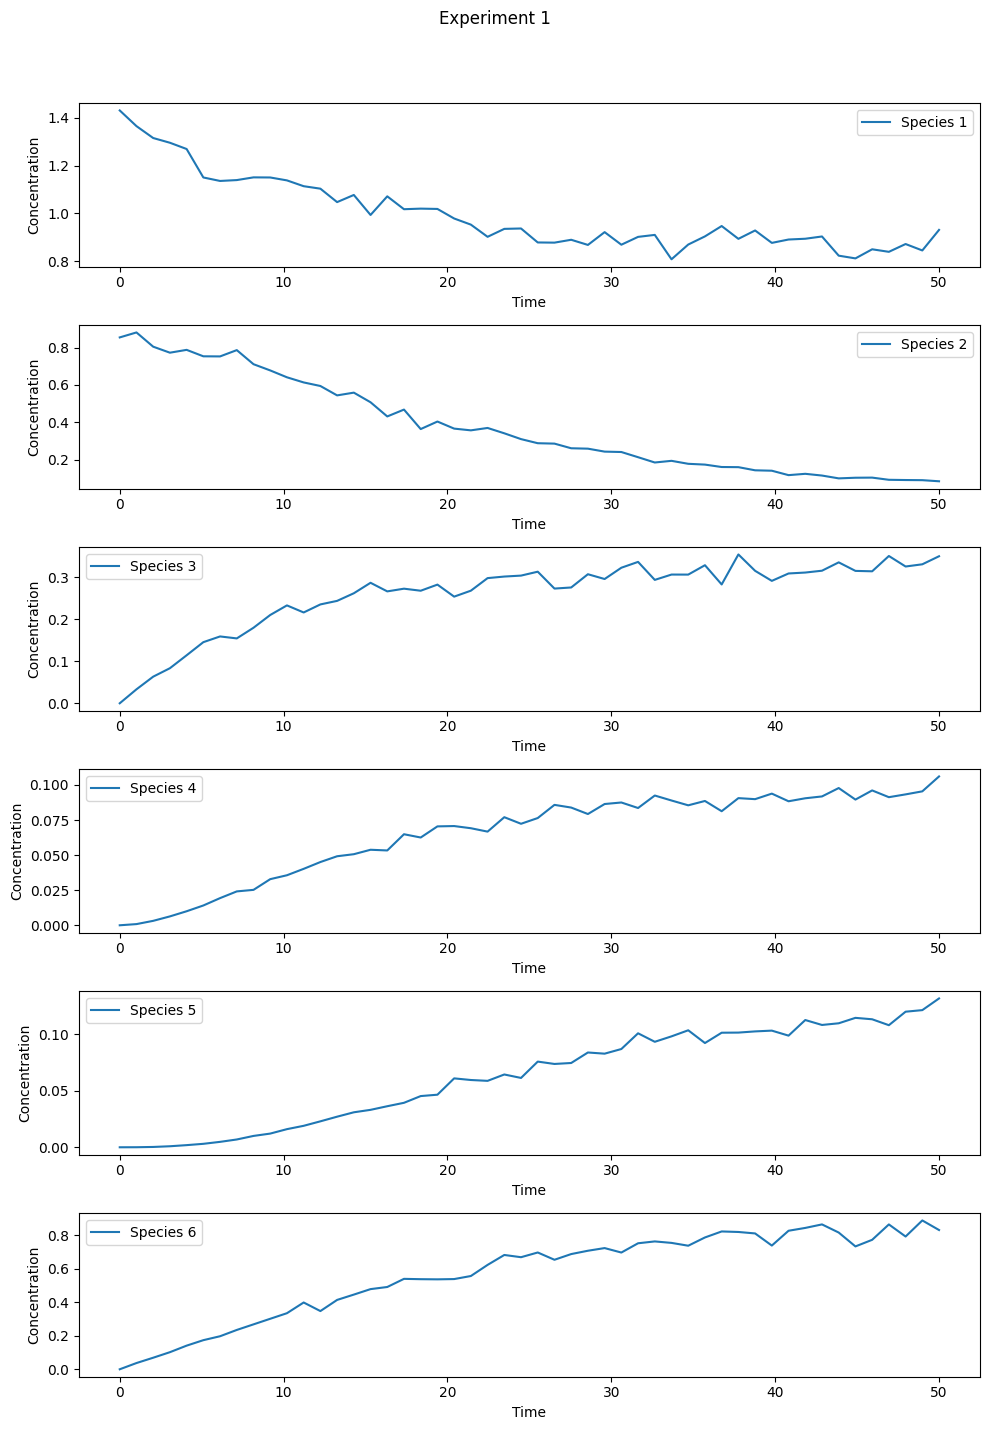

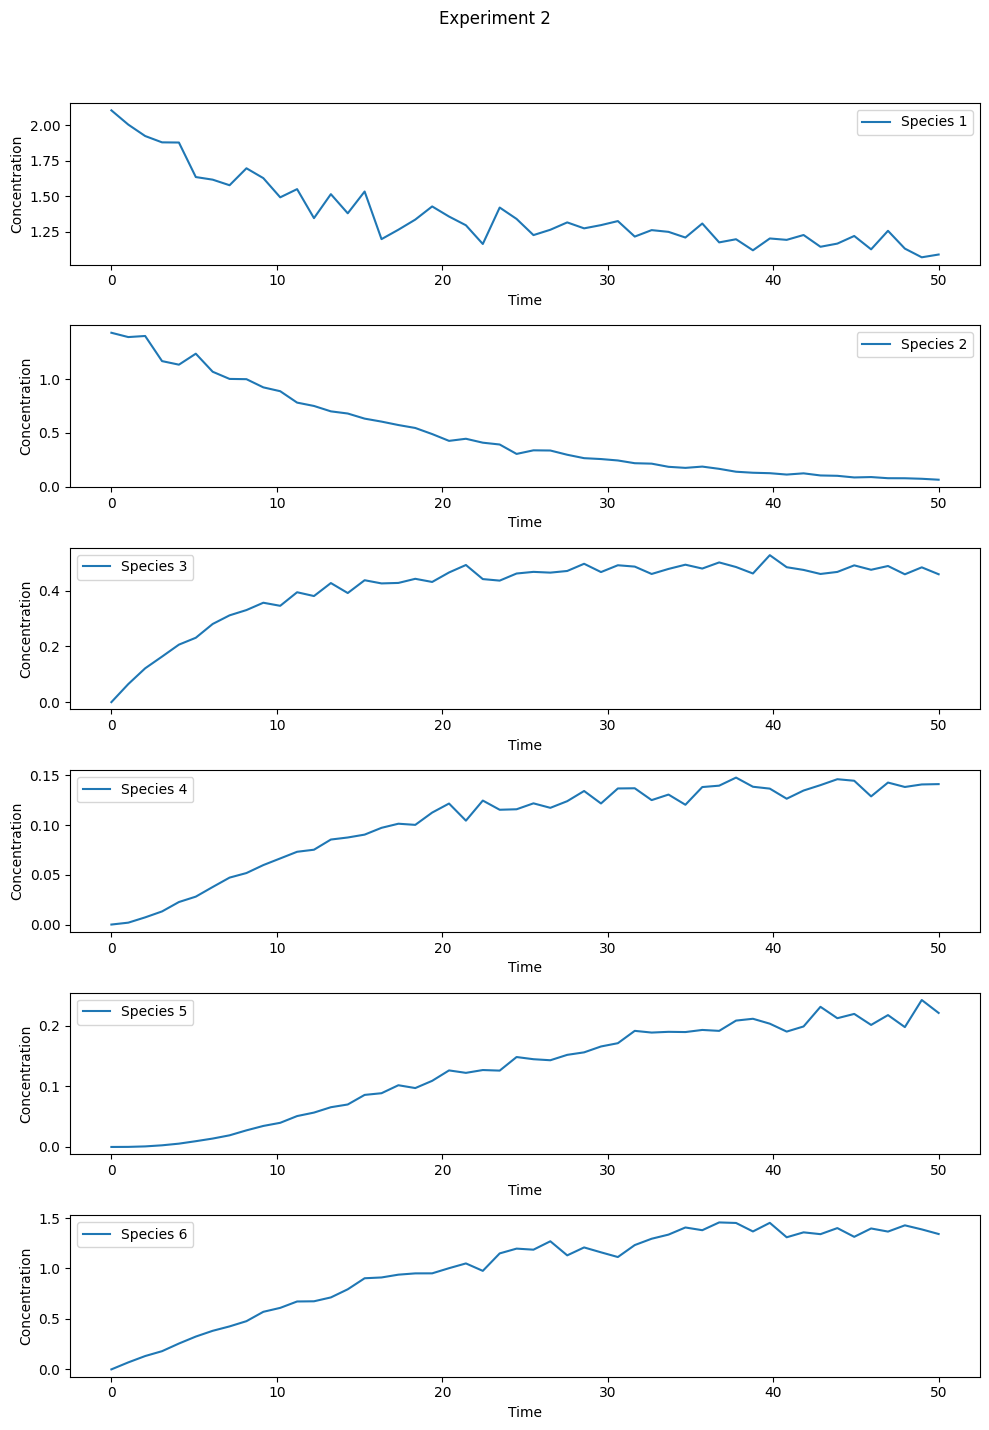

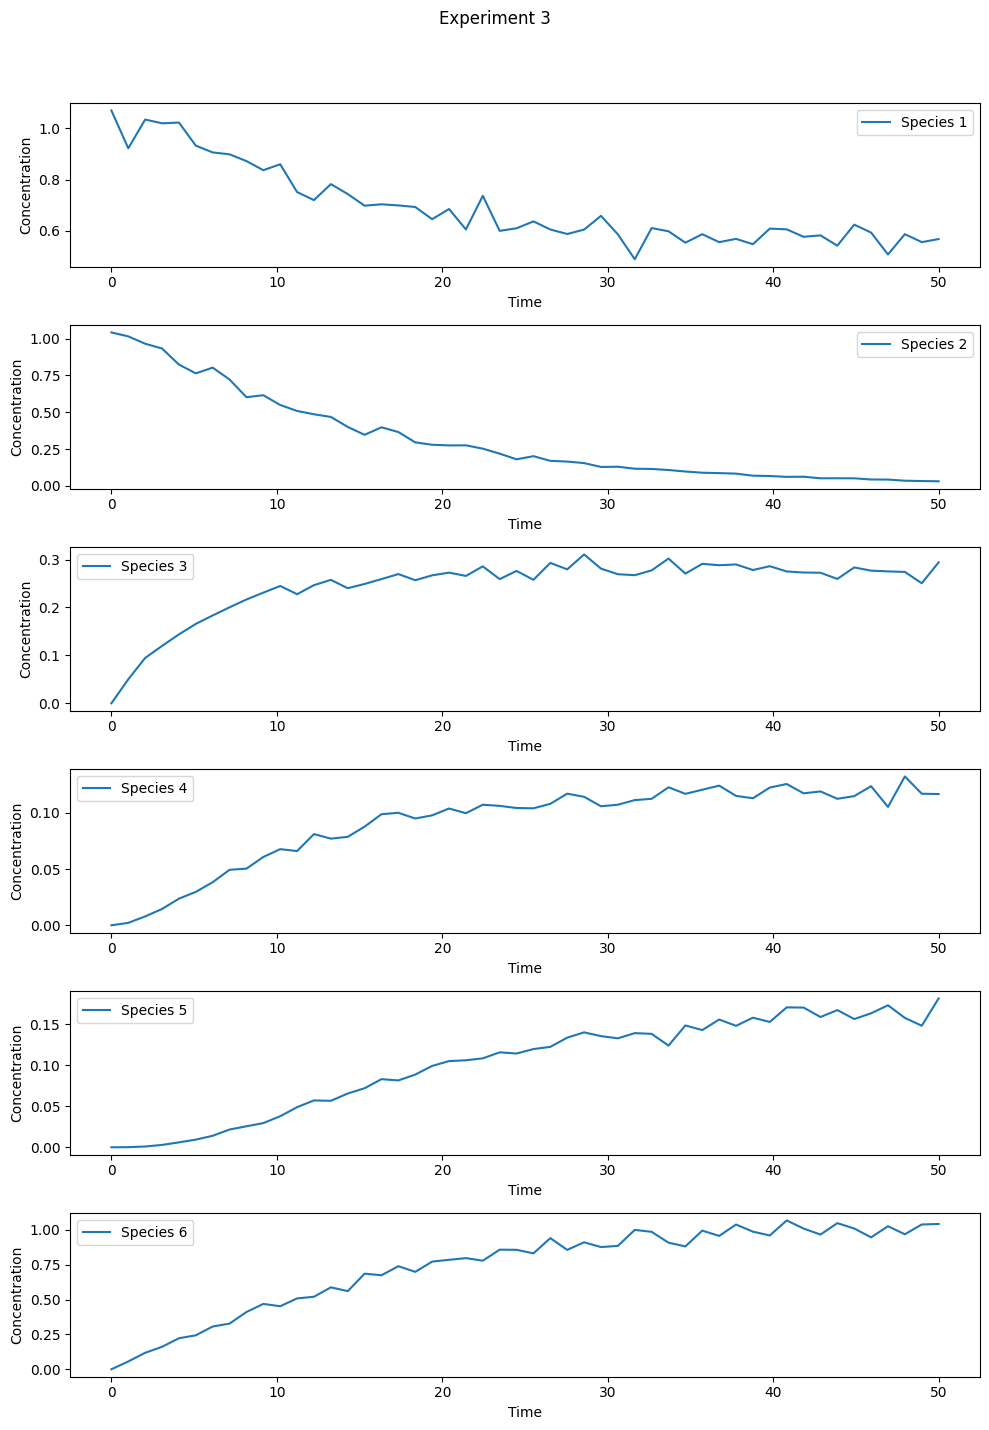

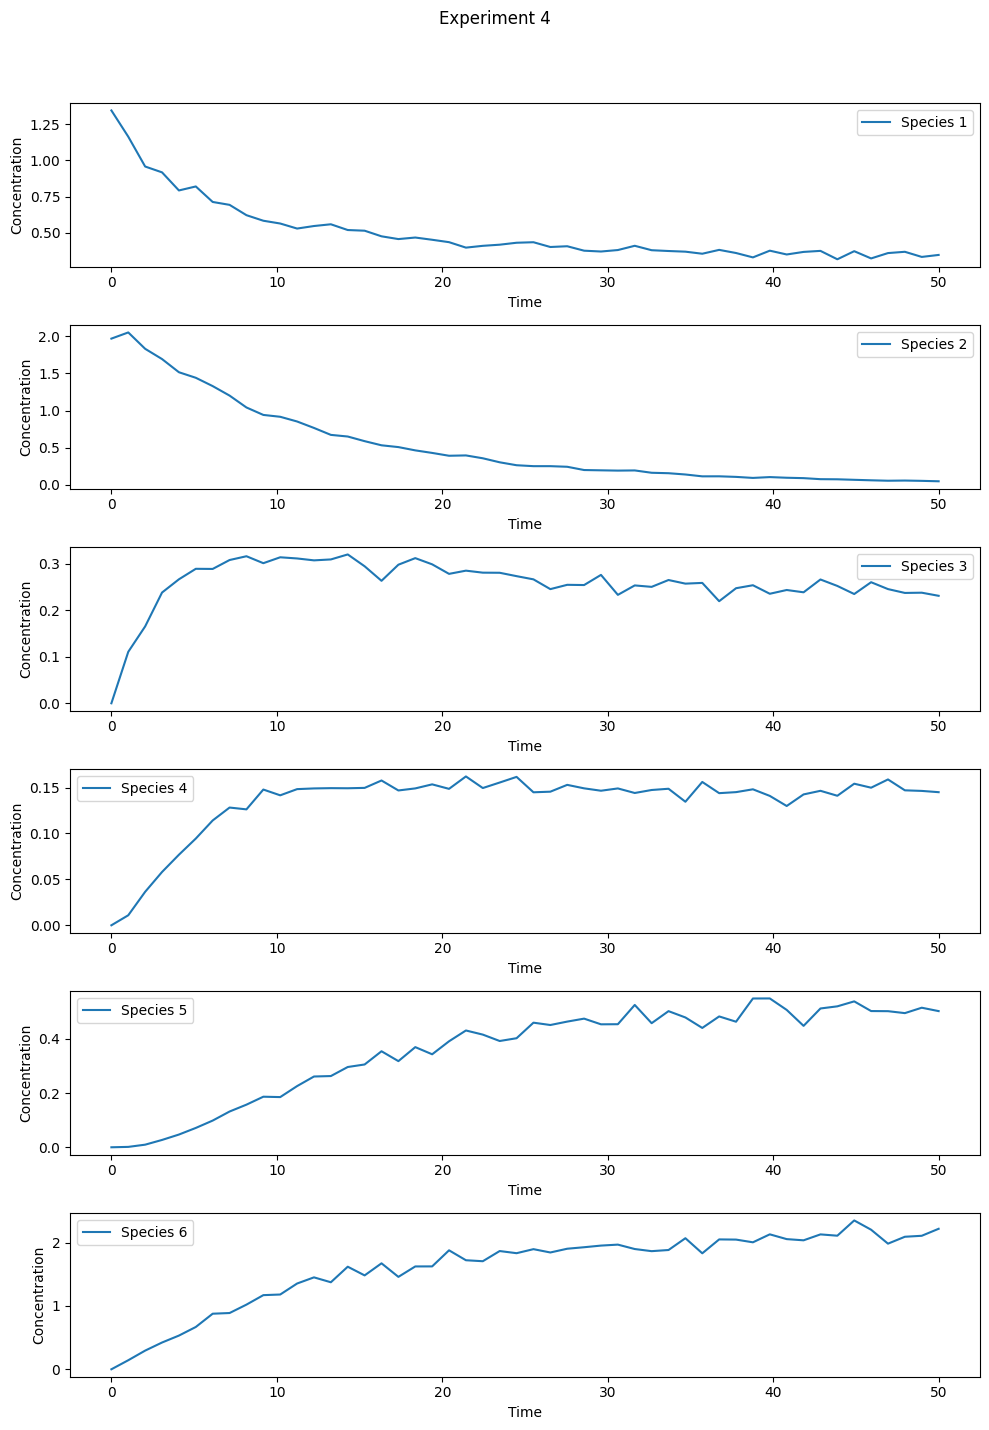

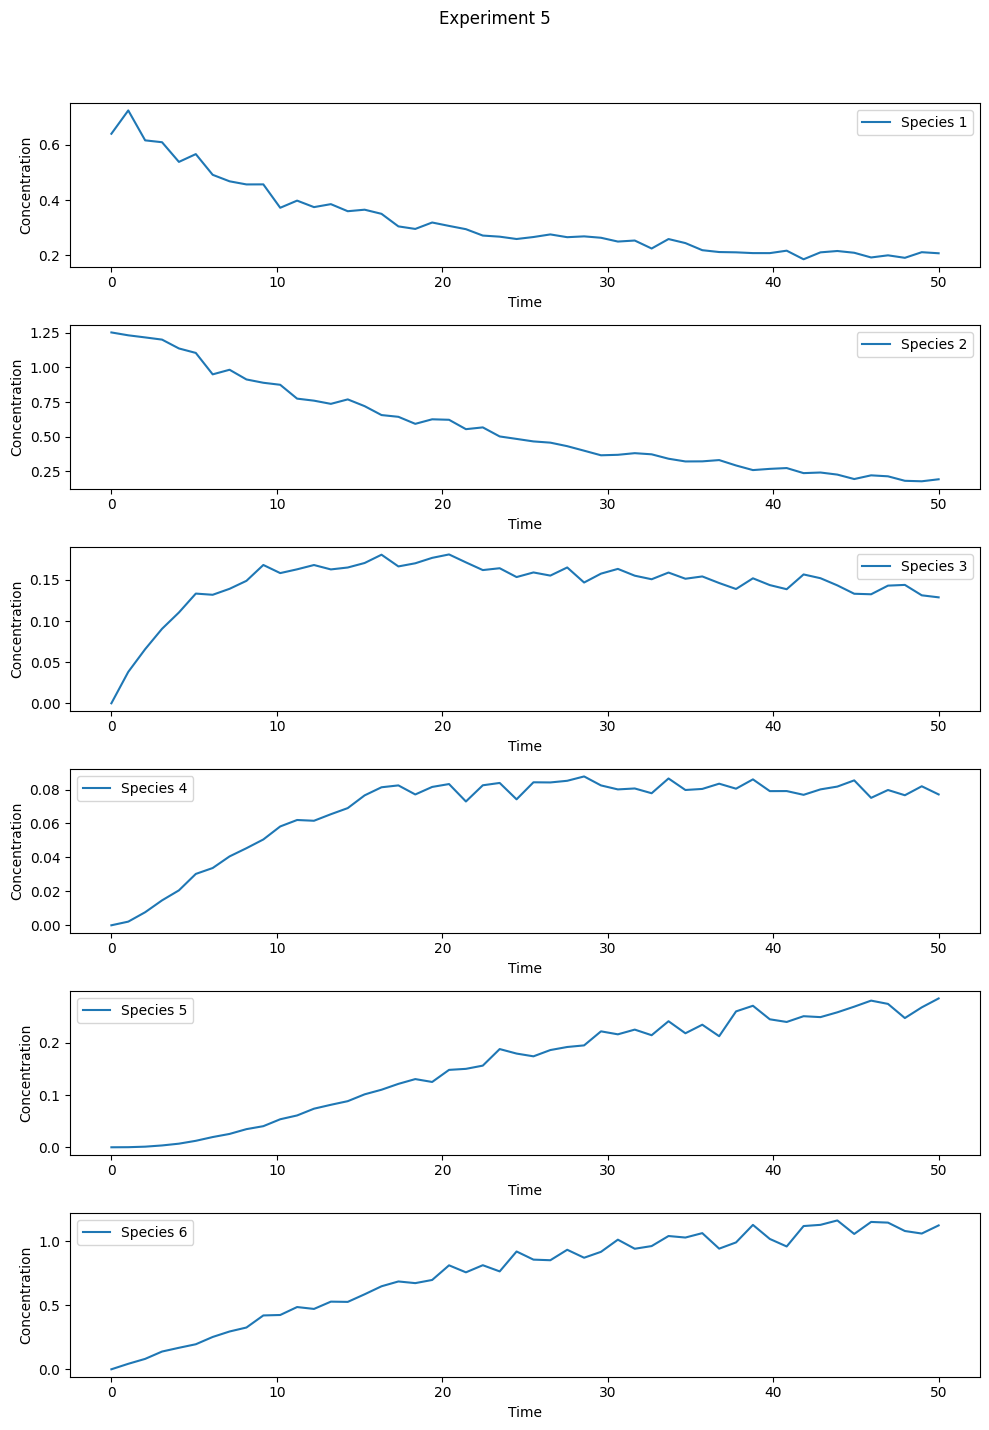

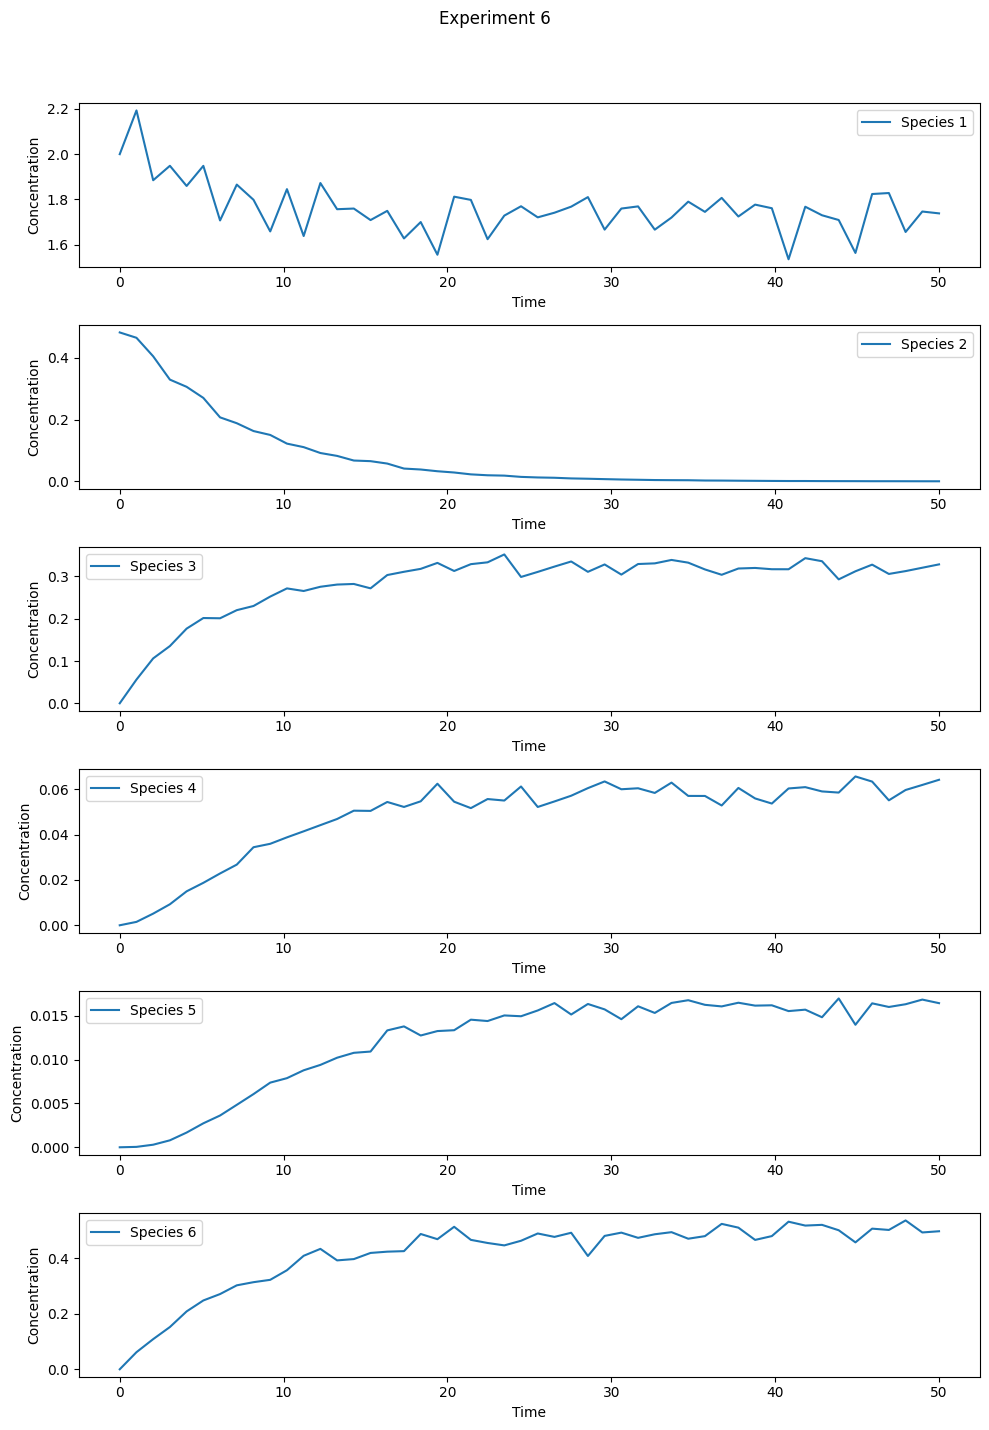

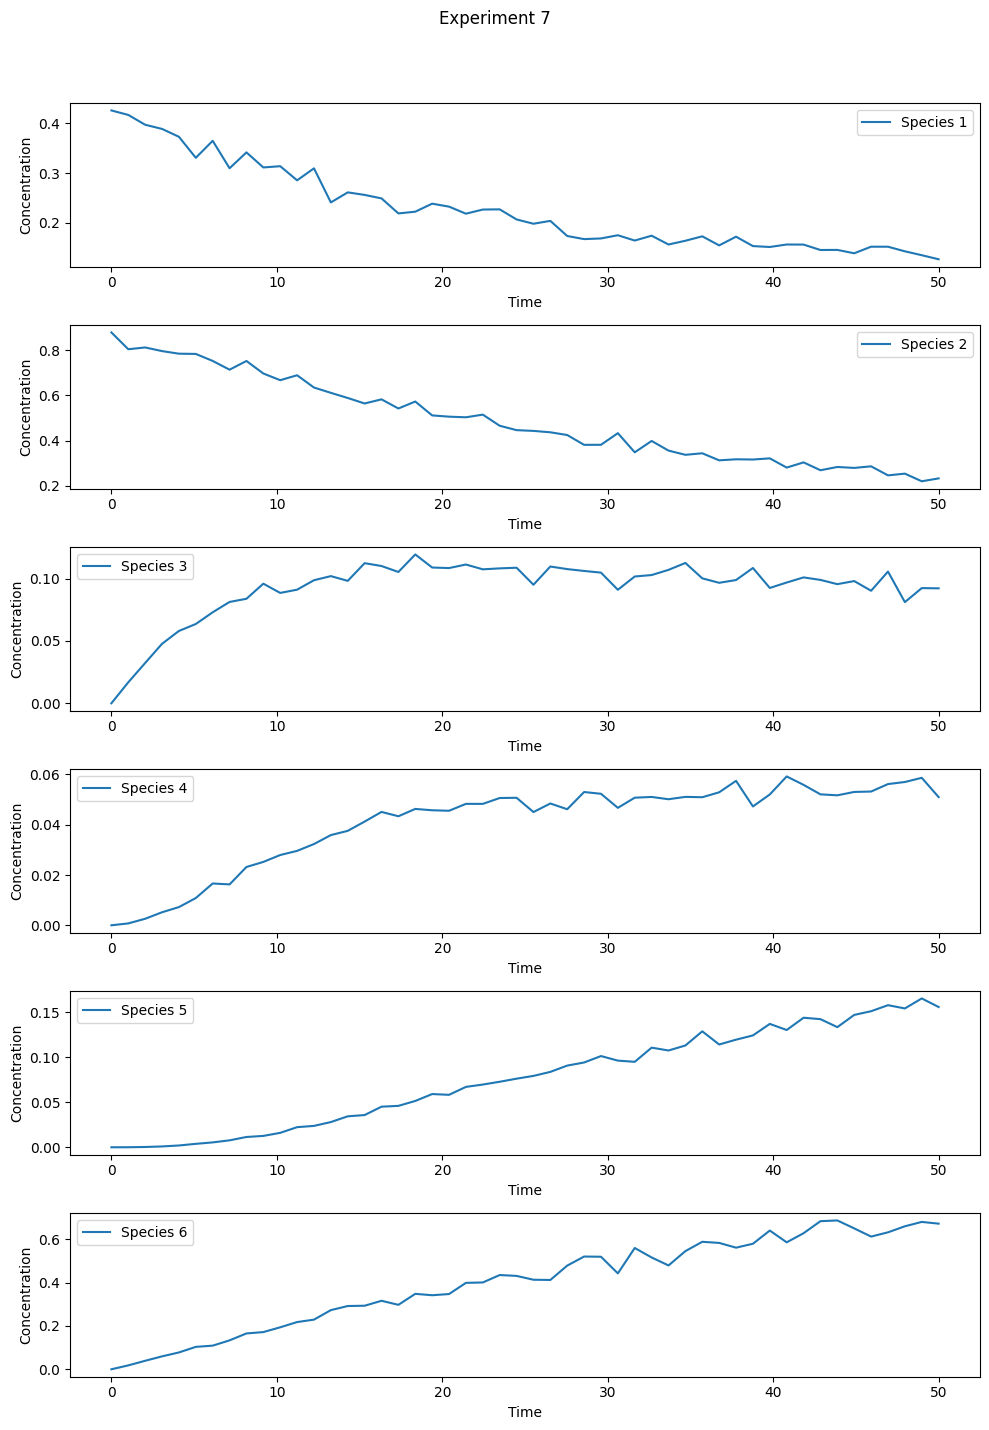

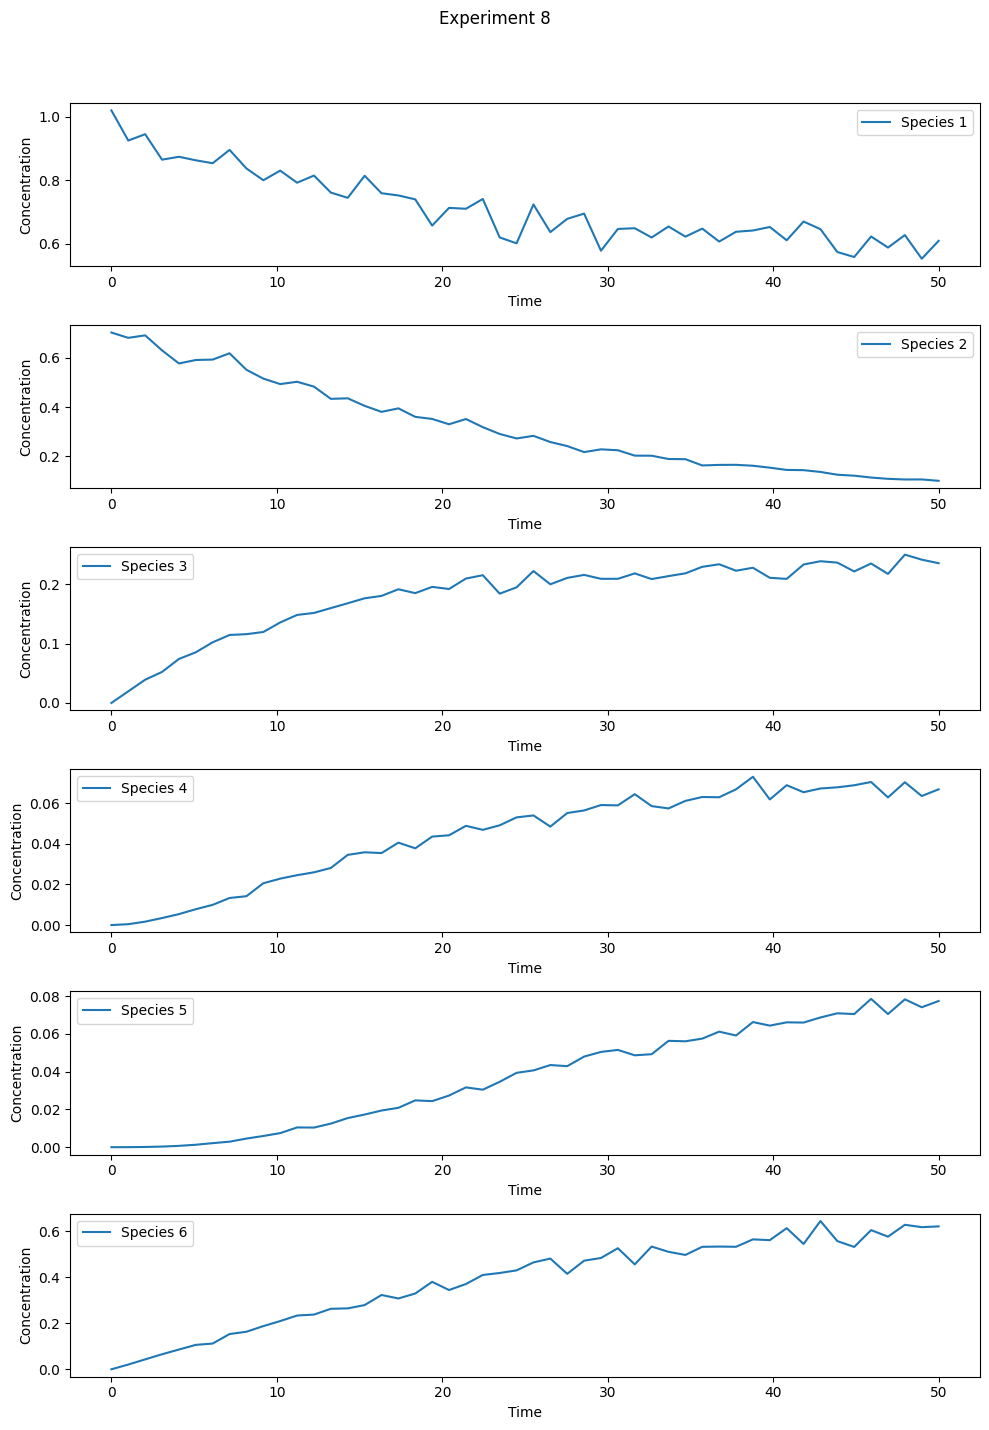

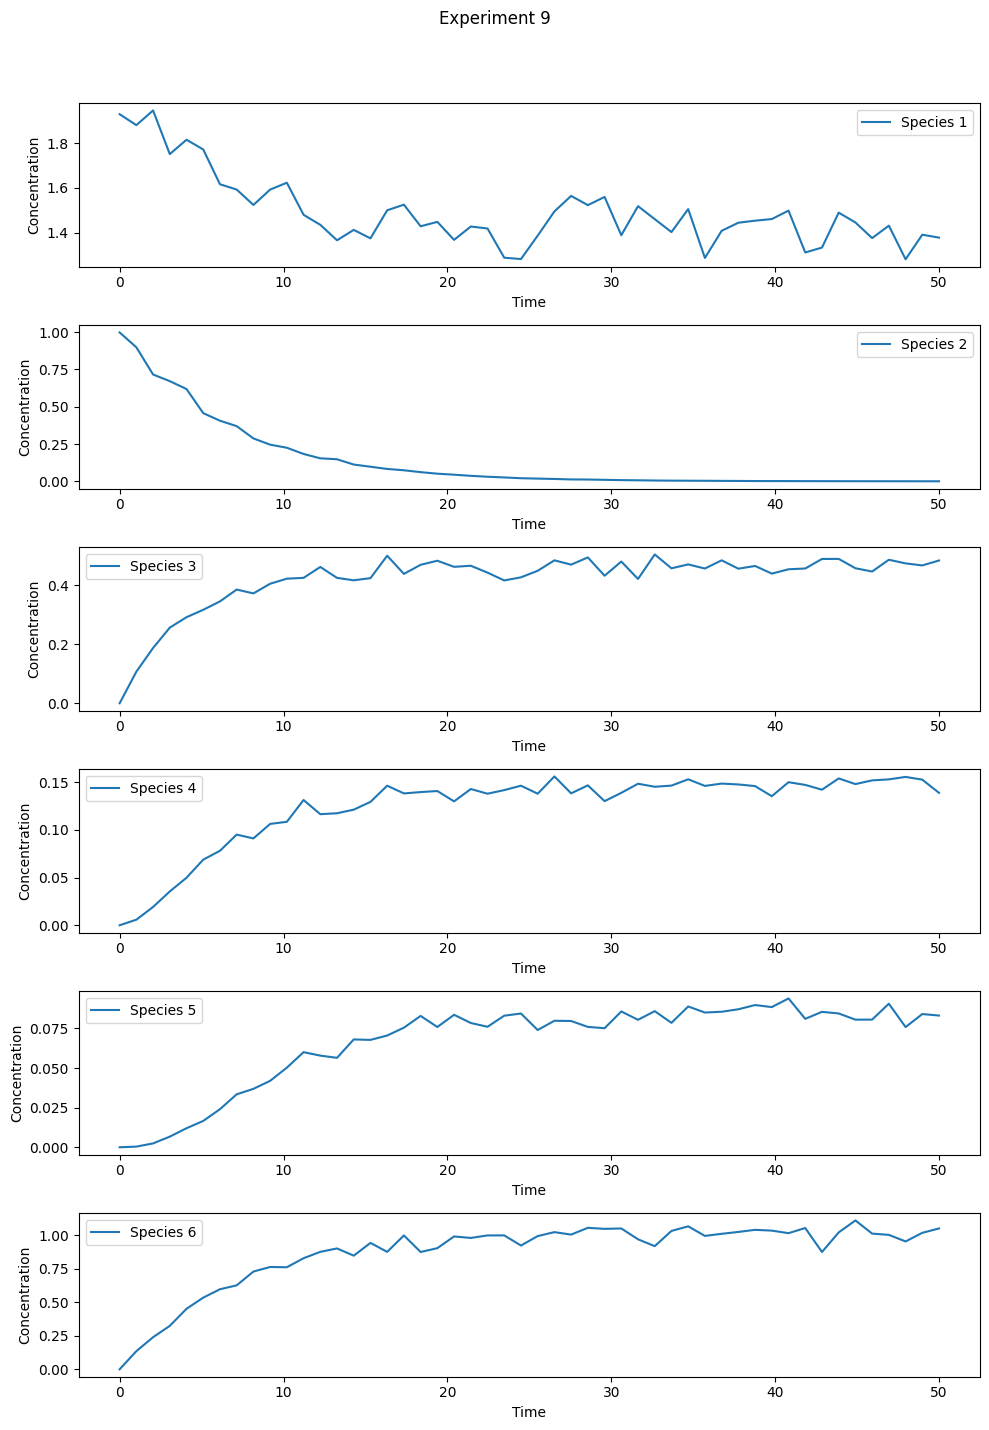

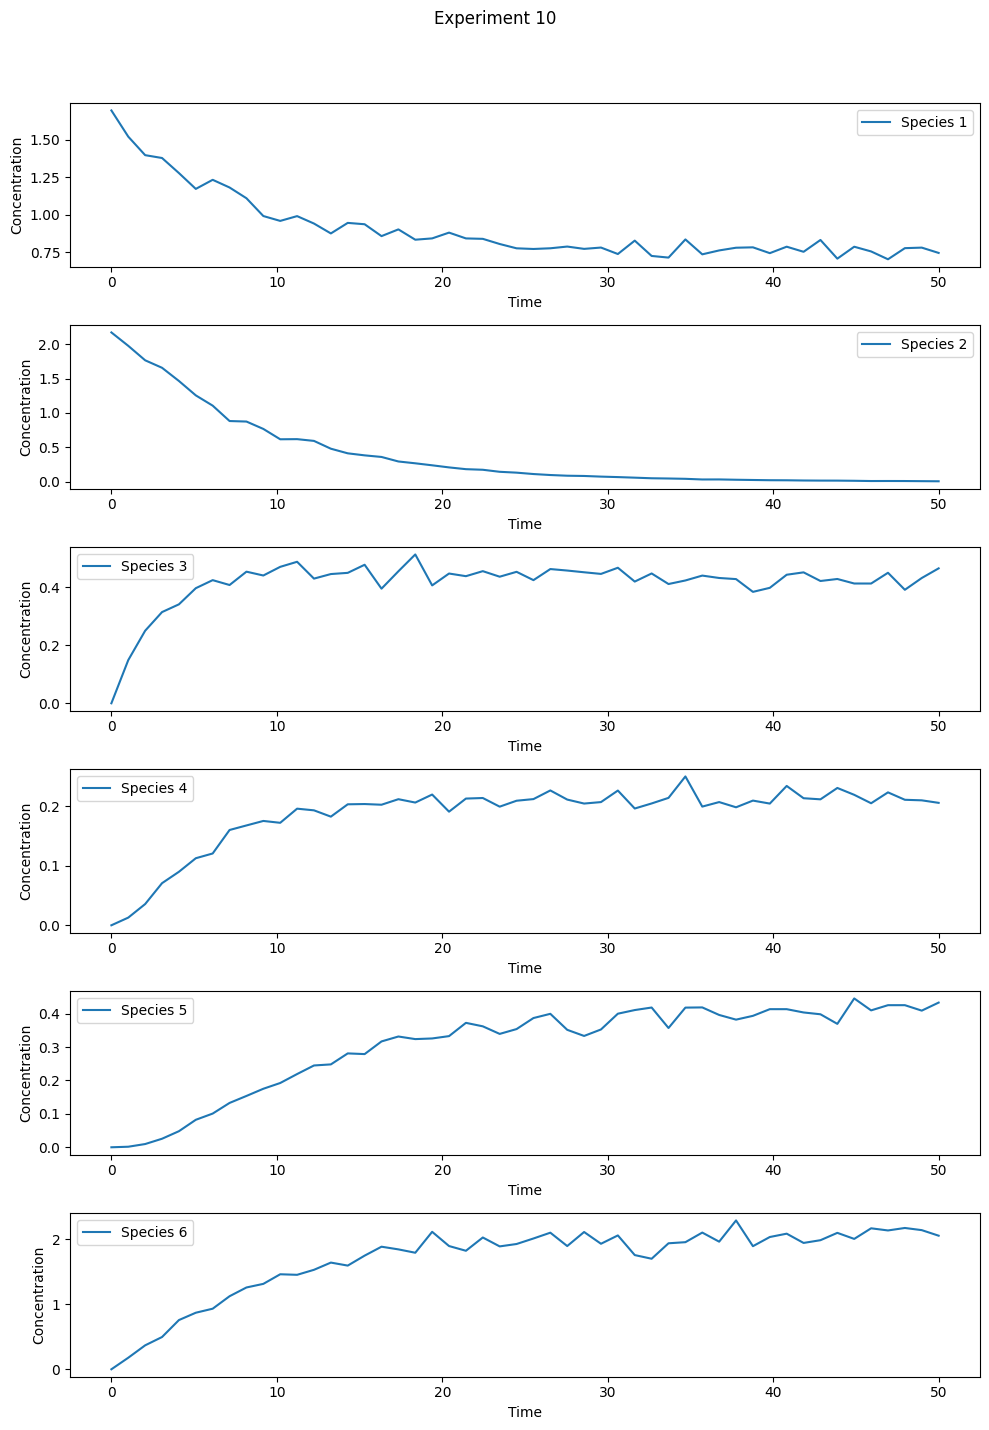

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 设定实验条件
n_exp = 10 # 生成10组实验数据
datasize = 50
tstep = 1
noise = 0.05
ns = 6
tspan = [0.0, datasize * tstep]
tsteps = np.linspace(tspan[0], tspan[1], datasize)

# 反应参数
logA = np.array([18.60, 19.13, 7.93])
Ea = np.array([14.54, 14.42, 6.47])  # kcal/mol

# Arrhenius方程
def Arrhenius(logA, Ea, T):
    R = 1.98720425864083e-3
    k = np.exp(logA) * np.exp(-Ea / R / T)
    return k

# 真正的ODE函数
def trueODEfunc(y, t, k):
    dydt = np.zeros(len(y))
    r1 = k[0] * y[0] * y[1]
    r2 = k[1] * y[2] * y[1]
    r3 = k[2] * y[3] * y[1]
    dydt[0] = -r1  # TG
    dydt[1] = -r1 - r2 - r3  # ROH
    dydt[2] = r1 - r2  # DG
    dydt[3] = r2 - r3  # MG
    dydt[4] = r3  # GL
    dydt[5] = r1 + r2 + r3  # R'CO2R
    return dydt

# 生成初始条件
u0_list = np.random.rand(n_exp, ns + 1).astype(np.float32)
u0_list[:, 0:2] = u0_list[:, 0:2] * 2.0 + 0.2
u0_list[:, 2:ns] = 0.0
u0_list[:, ns] = u0_list[:, ns] * 20.0 + 323.0  # 温度[K]

# 存储生成的数据
ode_data_list = np.zeros((n_exp, ns, datasize), dtype=np.float32)

# 生成数据并添加噪声
for i in range(n_exp):
    u0 = u0_list[i, :]
    k = Arrhenius(logA, Ea, u0[-1])
    ode_data = odeint(trueODEfunc, u0[:-1], tsteps, args=(k,))
    ode_data += np.random.randn(*ode_data.shape) * ode_data * noise
    ode_data_list[i, :, :] = ode_data.T

# 可视化生成的数据
for i in range(n_exp):
    fig, axs = plt.subplots(ns, 1, figsize=(10, 15))
    for j in range(ns):
        axs[j].plot(tsteps, ode_data_list[i, j, :], label=f"Species {j+1}")
        axs[j].set_xlabel("Time")
        axs[j].set_ylabel("Concentration")
        axs[j].legend()
    plt.suptitle(f"Experiment {i+1}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random

# 设置随机种子
np.random.seed(1234)
random.seed(1234)
tf.random.set_seed(1234)

# 参数设置
is_restart = True
n_epoch = 10000
n_plot = 50
datasize = 50
tstep = 1
n_exp_train = 20
n_exp_test = 10
n_exp = n_exp_train + n_exp_test
noise = 0.05
ns = 6
nr = 3
atol = 1e-6
rtol = 1e-3
lb = 1e-6
ub = 1e1

# 反应速率常数的参数
logA = np.array([18.60, 19.13, 7.93], dtype=np.float32)
Ea = np.array([14.54, 14.42, 6.47], dtype=np.float32) * 4184  # 转换为J/mol

def arrhenius(logA, Ea, T):
    R = 1.98720425864083e-3  # kcal/(mol*K)
    return np.exp(logA) * np.exp(-Ea / (R * T))

def true_ode_func(t, y, k):
    r1 = k[0] * y[0] * y[1]
    r2 = k[1] * y[2] * y[1]
    r3 = k[2] * y[3] * y[1]
    dydt = [-r1,
            -r1 - r2 - r3,
            r1 - r2,
            r2 - r3,
            r3,
            r1 + r2 + r3,
            0.0]
    return dydt

# 初始条件
u0_list = np.random.rand(n_exp, ns + 1).astype(np.float32)
u0_list[:, 0:2] = u0_list[:, 0:2] * 2.0 + 0.2
u0_list[:, 2:ns] = 0.0
u0_list[:, ns] = u0_list[:, ns] * 20.0 + 323.0  # T[K]

# 时间范围
tspan = [0.0, datasize * tstep]
tsteps = np.linspace(tspan[0], tspan[1], datasize)

# 生成数据集
ode_data_list = np.zeros((n_exp, ns, datasize), dtype=np.float32)

for i in range(n_exp):
    u0 = u0_list[i, :]
    T = u0[-1]
    k = arrhenius(logA, Ea, T)
    sol = solve_ivp(true_ode_func, tspan, u0, args=(k,), t_eval=tsteps, atol=atol, rtol=rtol)
    ode_data = sol.y[:-1]  # 去掉温度项
    ode_data += np.random.randn(*ode_data.shape) * ode_data * noise
    ode_data_list[i, :, :] = ode_data

# 数据标准化
yscale_list = []
for i in range(n_exp):
    ode_data = ode_data_list[i]
    yscale_list.append(np.max(ode_data, axis=1) - np.min(ode_data, axis=1) + lb)
yscale = np.max(np.stack(yscale_list), axis=0)

# 神经网络模型
class CRNN(tf.keras.Model):
    def __init__(self, nr, ns):
        super(CRNN, self).__init__()
        self.nr = nr
        self.ns = ns
        self.slope = tf.Variable(0.1, dtype=tf.float32)
        self.w_b = tf.Variable(tf.random.normal([nr], 0.1), dtype=tf.float32)
        self.w_out = tf.Variable(tf.random.normal([ns, nr], 0.1), dtype=tf.float32)
        self.w_in_Ea = tf.Variable(tf.abs(tf.random.normal([nr], 0.1)), dtype=tf.float32)
        self.w_in = tf.Variable(tf.clip_by_value(-self.w_out, 0, 4), dtype=tf.float32)

    def call(self, u):
        logX = tf.math.log(tf.clip_by_value(u[:-1], lb, ub))
        w_in_x = tf.linalg.matvec(self.w_in, tf.concat([logX, [inv_R / u[-1]]], axis=0))
        du = tf.concat([tf.linalg.matvec(self.w_out, tf.exp(w_in_x + self.w_b)), [0.0]], axis=0)
        return du

# 初始化模型和优化器
inv_R = -1 / 1.98720425864083e-3
model = CRNN(nr, ns)
optimizer = Adam(learning_rate=0.005)

# 定义损失函数和训练步骤
@tf.function
def loss_neuralode(model, u0, ode_data):
    pred = solve_ivp(lambda t, y: model(y), tspan, u0, t_eval=tsteps, atol=atol, rtol=rtol).y
    pred = tf.clip_by_value(pred, -ub, ub)
    return tf.reduce_mean(tf.keras.losses.MSE(ode_data, pred))

@tf.function
def train_step(model, u0, ode_data):
    with tf.GradientTape() as tape:
        loss = loss_neuralode(model, u0, ode_data)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# 训练模型
for epoch in range(n_epoch):
    for i in range(n_exp_train):
        u0 = u0_list[i, :]
        ode_data = ode_data_list[i, :, :]
        loss = train_step(model, u0, ode_data)
        if epoch % n_plot == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# 可视化生成的数据
for i in range(n_exp):
    for j in range(ns):
        plt.plot(tsteps, ode_data_list[i, j, :], label=f'Exp {i+1}, Species {j+1}')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'